<img src="https://www.institucional.frc.utn.edu.ar/cienciasbasicas/pub/image/UTN%20%20-%20FRC%20(2).png" width="350" height="160">


**LICENCIATURA EN TECNOLOGIAS EDUCATIVAS**

**SEMINARIO DE PRACTICA DE TECNOLOGÍA EDUCATIVA**

SEGUNDO AÑO

---

## **Modelo de Red Neuronal Artificial para Predecir Resultados Académicos en Matemática II con Keras**

---



Discentes:

*   Prof. Kasper, Rebeca
*   Prof. Minoldo, María Lucía
*   Prof. Moreno, Raúl


Docente: Prof. Dr. Paez, Roberto

20 de Mayo de 2024



## **Introducción**
En esta presentación, se abordará el desarrollo y análisis de un modelo de red neuronal artificial para la predicción del rendimiento académico de estudiantes de análisis matemático II. Se explicará el proceso de creación del modelo, su entrenamiento, evaluación y los resultados obtenidos. Se discutirán las implicaciones de estos resultados y se propondrán algunas recomendaciones para futuras investigaciones.

-----

## **Objetivo:**
Diseñar y entrenar un modelo de RNA que pueda predecir los resultados académicos de los estudiantes en la asignatura de Matemática II.

----


# **Motivación y Contexto**


*   Importancia del rendimiento académico en la educación superior.
*   Desafíos en la predicción del rendimiento académico.
*   Potencial de las redes neuronales artificiales para la predicción del rendimiento académico.



## **Pasos a seguir**:

1. **Preparación de datos acádemicos**
  
2. **Diseño del modelo de datos**

3. **Implementación y entrenamiento del modelo de datos**

4. **Evaluación del modelo de datos**

5. **Visualización de las predicciones academicas**

6. **Analisís de Resultados**

## **Detalles del Procedimiento**

### 1. Preparacion de datos

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Cargar datos desde el archivo CSV
datos = pd.read_csv('datos_rendimiento.csv', sep=';')



### 2. Diseño del modelo de datos





In [ ]:
# Codificar variables categóricas
encoder = LabelEncoder()
datos['genero'] = encoder.fit_transform(datos['genero'])
datos['nivel_educativo_padres'] = encoder.fit_transform(datos['nivel_educativo_padres'])

# Dividir los datos en características (X) y etiqueta (y)
X = datos[['edad', 'genero', 'nivel_educativo_padres', 'horas_estudio']]
y = datos['rendimiento']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


### 3. Implementación y entrenamiento del modelo

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en los datos de prueba
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Pérdida de prueba:', test_loss)
print('Error absoluto medio de prueba:', test_mae)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 7279.1338 - mae: 84.9040 - val_loss: 5780.0737 - val_mae: 74.6661
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 7135.9434 - mae: 84.0578 - val_loss: 5660.2803 - val_mae: 73.8681
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 7002.6152 - mae: 83.2622 - val_loss: 5548.3706 - val_mae: 73.1091
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 6879.4014 - mae: 82.5196 - val_loss: 5438.9937 - val_mae: 72.3620
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 6761.0781 - mae: 81.8006 - val_loss: 5333.5410 - val_mae: 71.6358
Epoch 6/100
1/1 [==============================] - 0s 36ms/step - loss: 6645.6758 - mae: 81.0928 - val_loss: 5229.2266 - val_mae: 70.9102
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 6532.8711 - mae: 80.3963 - val_loss: 5127.3389 - val_mae: 70.1969
Epoch 8/100
1/1 [===================

### 4. Evaluar el modelo de datos

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Pérdida de prueba:', test_loss)
print('Error absoluto medio de prueba:', test_mae)

1/1 [==============================] - 0s 34ms/step - loss: 89.4541 - mae: 8.8989
Pérdida de prueba: 89.4541244506836
Error absoluto medio de prueba: 8.898918151855469


### 5. Visualización de resultados de las predicciones acádemicas

1/1 [==============================] - 0s 127ms/step


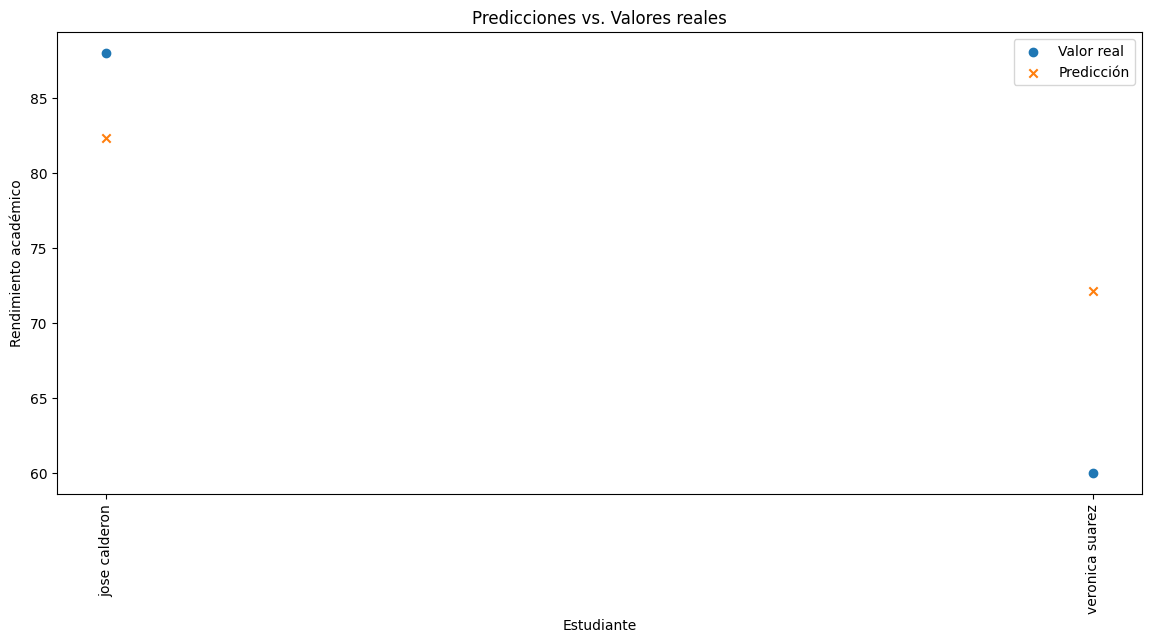

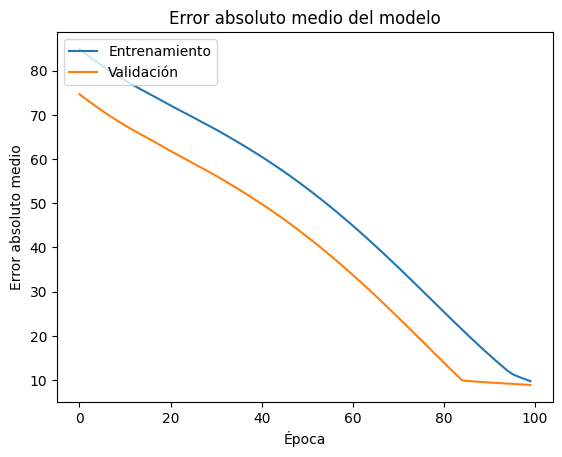

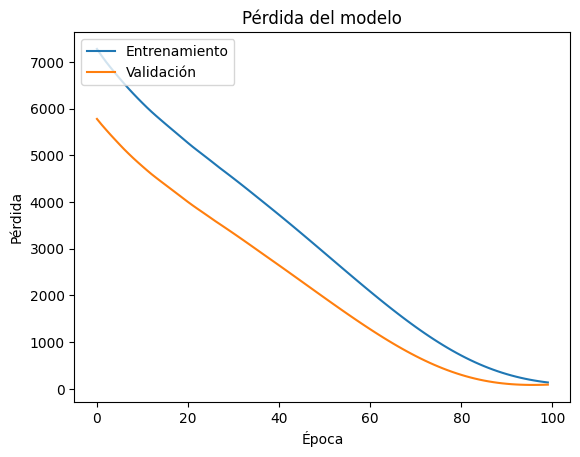

In [ ]:
# Visualizar gráficos de resultados
def visualizar_predicciones(X_test, y_test, predicciones, nombres_estudiantes):
    plt.figure(figsize=(14, 6))
    plt.scatter(range(len(y_test)), y_test, label='Valor real', marker='o')
    plt.scatter(range(len(y_test)), predicciones.flatten(), label='Predicción', marker='x')
    plt.xticks(range(len(y_test)), nombres_estudiantes, rotation=90)
    plt.xlabel('Estudiante')
    plt.ylabel('Rendimiento académico')
    plt.title('Predicciones vs. Valores reales')
    plt.legend()
    plt.show()

# Hacer predicciones en el conjunto de prueba
predicciones = model.predict(X_test)

# Visualizar las predicciones para cada estudiante
nombres_estudiantes = datos.iloc[X_test.index]['nombre_apellido']
visualizar_predicciones(X_test, y_test, predicciones, nombres_estudiantes)

# Graficar la precisión durante el entrenamiento
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Error absoluto medio del modelo')
plt.xlabel('Época')
plt.ylabel('Error absoluto medio')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

Las gráficas de predicciones vs. valores reales y de precisión del entrenamiento permiten observar cómo el modelo se comporta en los datos de prueba y cómo aprende a lo largo del entrenamiento. Sin embargo, es importante tener en cuenta que la evaluación del modelo debe basarse en métricas cuantitativas como test_loss y test_mae, ya que las visualizaciones pueden ser subjetivas.


## Analisís de de los resultados del gráfico adjunto:

El gráfico de valores reales vs valores de prediciones muestra la diferencia entre las predicciones realizadas por un modelo de red neuronal artificial y los valores reales del rendimiento académico de los estudiantes. Se podrá  observa que las predicciones del modelo se encuentran, en general, por encima de los valores reales. Esto significa que el modelo tiende a sobreestimar el rendimiento académico de los estudiantes.

- El eje X representa los valores reales del rendimiento académico de los estudiantes, mientras que el eje Y representa las predicciones del modelo.
- Se puede observar que la mayoría de los puntos se encuentran por encima de la línea diagonal, lo que indica que el modelo sobreestima el rendimiento académico en la mayoría de los casos.
- La dispersión de los puntos sugiere que la sobreestimación no es uniforme, es decir, el modelo sobreestima el rendimiento académico en mayor medida para algunos estudiantes que para otros.
- Es importante tener en cuenta que la escala de los ejes no es la misma, lo que puede dificultar la comparación directa entre las predicciones y los valores reales.

**Posibles causas de la sobreestimación:**

- El modelo puede estar aprendiendo patrones en los datos que no son relevantes para el rendimiento académico real ej. Nivel Academicos de los Padres/Madres.
- Los datos de entrenamiento pueden estar sesgados hacia estudiantes con un rendimiento académico más alto.
- El modelo puede ser demasiado complejo y estar aprendiendo demasiado de los datos de entrenamiento, lo que le lleva a sobreestimar el rendimiento académico en los datos de prueba.

**Implicaciones de la sobreestimación:**

- La sobreestimación del rendimiento académico puede tener consecuencias negativas, como la selección de estudiantes que no están preparados para el siguiente nivel educativo o la asignación de becas a estudiantes que no las necesitan.
- Es importante tener en cuenta las limitaciones del modelo y no confiar únicamente en sus predicciones para tomar decisiones importantes.

**Recomendaciones:**

- Se deben realizar análisis adicionales para identificar las causas de la sobreestimación y explorar posibles soluciones.
- Se puede considerar utilizar un conjunto de datos de entrenamiento más diverso o aplicar técnicas de regularización para evitar que el modelo aprenda patrones irrelevantes.
- Se recomienda evaluar el rendimiento del modelo en diferentes subgrupos de la población estudiantil para identificar posibles sesgos.
- Es importante comunicar las limitaciones del modelo a los usuarios y enfatizar la necesidad de utilizar otras fuentes de información para tomar decisiones informadas.



## **Referencias**


**Epoch. Epocas**:
Un Epoch o época es cuando todos los datos de entrenamiento se usan a la vez y se define como el número total de iteraciones de todos los datos de entrenamiento en un ciclo para entrenar el modelo de aprendizaje automático. El número de épocas se considera un hiperparámetro, ya que efine el número de veces que todo el conjunto de datos debe trabajarse a través del algoritmo de aprendizaje. Cada muestra en el conjunto de datos de entrenamiento ha tenido la oportunidad de actualizar los parámetros del modelo interno una vez durante una época, endonde uno o más lotes componen una Epoch.

**Keras:** es una librería de alto nivel para redes neuronales artificiales en Python. Es una API de código abierto sobre la base de TensorFlow, que facilita la creación y entrenamiento de modelos de aprendizaje profundo. Keras proporciona una interfaz sencilla y expresiva para definir la arquitectura de las redes, configurar el entrenamiento y evaluar los resultados.

**TensorFlow:** es una librería de código abierto para computación numérica y aprendizaje automático desarrollada por Google. Proporciona un entorno flexible y eficiente para definir y ejecutar operaciones matemáticas complejas, incluyendo el entrenamiento de redes neuronales artificiales. TensorFlow se basa en el concepto de "grafos de flujo de datos", que permite representar las operaciones matemáticas como nodos en un grafo y las dependencias entre ellas como aristas.

**Relación entre Keras y TensorFlow:** Keras se construye sobre TensorFlow, aprovechando su potencia y flexibilidad para la ejecución de cálculos. TensorFlow proporciona la infraestructura subyacente para las operaciones matemáticas, mientras que Keras ofrece una interfaz de alto nivel más accesible para los usuarios. En otras palabras, Keras simplifica el proceso de creación y entrenamiento de modelos de aprendizaje profundo utilizando TensorFlow como base.


## **Referencias Bibliográficas:**

Apuntes de la cátedra de Desarrollo de Sistema de Inteligencia Artificial. (2023). Tecnicatura Superior de Tecnologías e Innovación 4.0 . Instituto Superior del Politécnico Córdoba.

Enseñanza de la resolución de problemas matemáticos: Un análisis de correspondencias múltiples 1: Donoso Osorio, E., Valdés Morales, R., Cisternas Núñez, P., & Cáceres Serrano, P. (2020). Enseñanza de la resolución de problemas matemáticos: Un análisis de correspondencias múltiples. Diálogos sobre educación. Temas actuales en investigación educativa, 11(21). DOI: 10.32870/dse.v0i21.629

Incio-Flores, F. A., Capuñay-Sanchez, D. L., & Estela-Urbina, R. O. (2023). Modelo de red neuronal artificial para predecir resultados académicos en la asignatura Matemática II. Educare, 27(1), 338-359. DOI: https://doi.org/10.15359/ree.27-1.14516
